In [84]:
import Pkg
Pkg.activate("packages/")
using Plots
include("inference.jl")
include("population_dynamics.jl")

  Activating environment at `~/Documents/Still evolving/Quantifying-SIM-exp/packages/Project.toml`


mutants_off_switch_on (generic function with 1 method)

In [100]:
d_range = collect(0:0.2:1)
P_list = []
f_range = collect(0.:0.01:0.1)
m_range = collect(4:0.1:7)
for div_on in d_range
    T = t_expected_m(10^4*0.95, 0.95, 10^-8, 0.05, 10^4*0.05, div_on, 10^-6, 1)
    mc_true, Nf, f_on = mutant_count(T, 10^4, 1, 10^-8, 0.05, div_on, 10^-6, 10^4)
    LL = Matrix{Float64}(undef, (length(f_range), length(m_range)))
    for i in eachindex(m_range)
        for j in eachindex(f_range)
            p = P_mutant_count(100, Nf*10^-8, m_range[i], f_range[j], rel_div_on=0.)
            LL[j,i] = -sum(counts(mc_true, 0:100) .* log.(p))
        end
    end
    P = surface(LL, title="$div_on")
    println(argmin(LL))
    push!(P_list, P)
end   

CartesianIndex(1, 14)
CartesianIndex(1, 31)
CartesianIndex(1, 31)
CartesianIndex(1, 31)
CartesianIndex(1, 31)
CartesianIndex(1, 31)


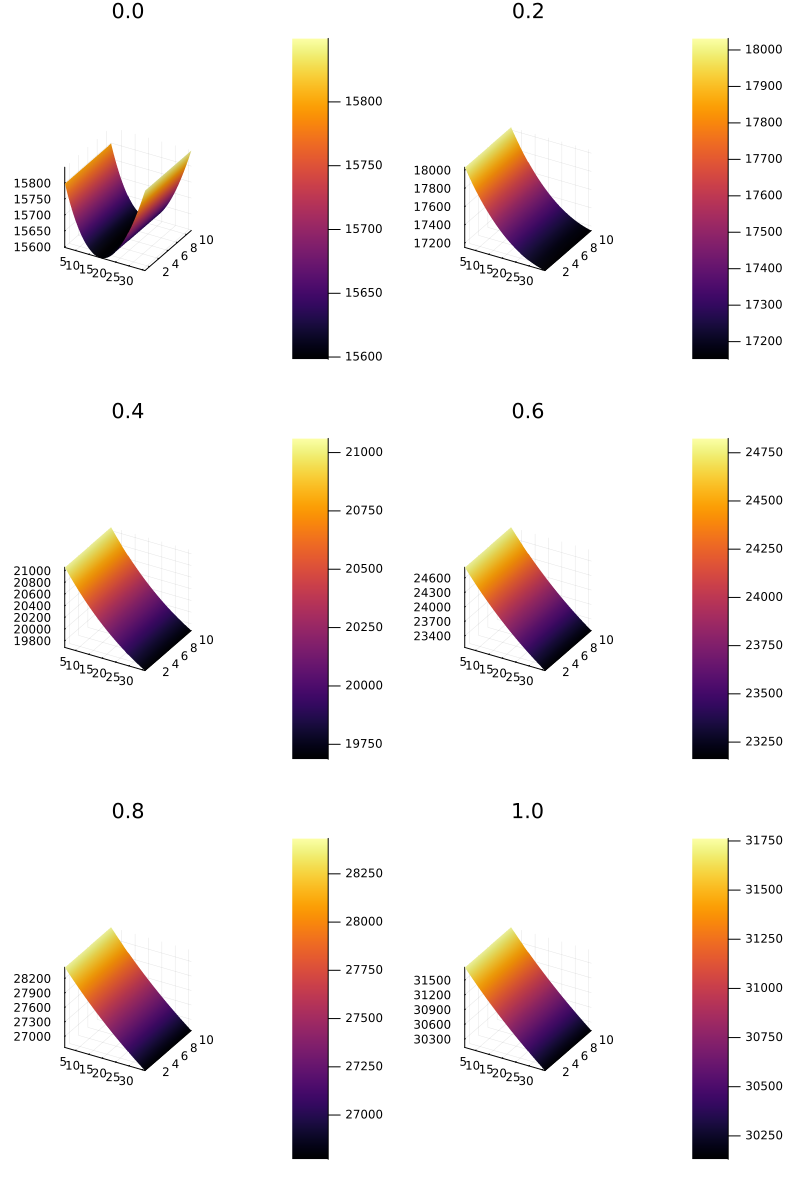

In [101]:
plot(P_list[1], P_list[2], P_list[3], P_list[4], P_list[5], P_list[6], layout=(3,2), size=(800,1200))

In [102]:
d_range = collect(0:0.2:1)
P_list = []
f_range = collect(0.:0.01:0.1)
m_range = collect(4:0.1:7)
for div_on in d_range
    T = t_expected_m(10^4*0.95, 0.95, 10^-8, 0.05, 10^4*0.05, div_on, 10^-6, 1)
    mc_true, Nf, f_on = mutant_count(T, 10^4, 1, 10^-8, 0.05, div_on, 10^-6, 10^4)
    LL = Matrix{Float64}(undef, (length(f_range), length(m_range)))
    for i in eachindex(m_range)
        for j in eachindex(d_range)
            p = P_mutant_count(100, Nf*10^-8, m_range[i], f_on, rel_div_on=d_range[j])
            LL[j,i] = -sum(counts(mc_true, 0:100) .* log.(p))
        end
    end
    P = surface(LL, title="$div_on")
    println(argmin(LL))
    push!(P_list, P)
end   

CartesianIndex(11, 23)
CartesianIndex(8, 1)
CartesianIndex(10, 2)
CartesianIndex(7, 31)
CartesianIndex(9, 31)
CartesianIndex(7, 14)


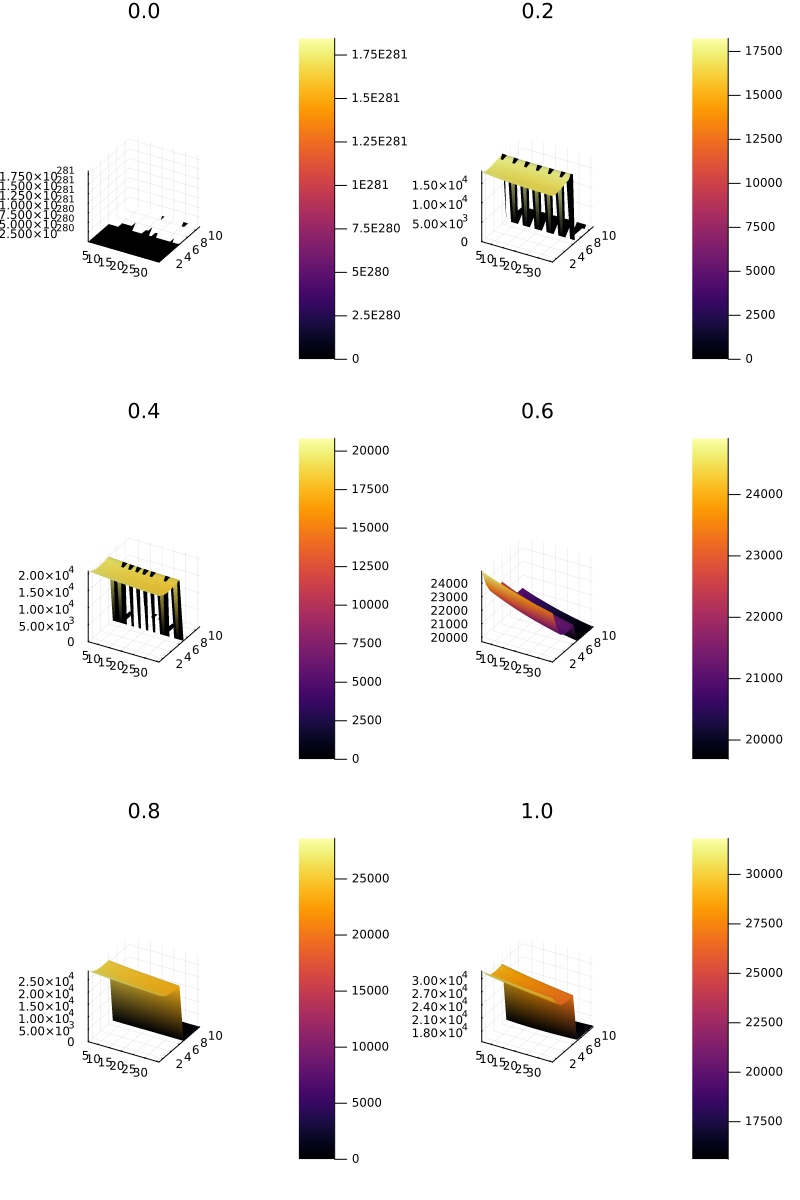

In [103]:
plot(P_list[1], P_list[2], P_list[3], P_list[4], P_list[5], P_list[6], layout=(3,2), size=(800,1200))